<a href="https://colab.research.google.com/github/lynnlyn620/nyu-python-public-policy/blob/master/homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Step 1. Create a list of the top 10 complaint types (i.e. the complaint type categories that have the most records in our 311 dataset). Save the list as an object called top_10.

In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [84]:
top_10=df.groupby('complaint_type').size().nlargest(10).reset_index('complaint_type')
top_10

,complaint_type,0
0,Noise - Residential,236350
1,HEAT/HOT WATER,205985
2,Illegal Parking,195159
3,Request Large Bulky Item Collection,177175
4,Blocked Driveway,145446
5,Noise - Street/Sidewalk,95977
6,Street Condition,93341
7,UNSANITARY CONDITION,81713
8,Water System,70509
9,Noise,59007



Step 2. Filter the 311 dataset to only 311 requests that have complaint types in top_10. Save this subset of data as a dataframe called filtered_311.

In [29]:
filtered_311=df[(df.complaint_type == 'Noise - Residential')|(df.complaint_type=='HEAT/HOT WATER')|(df.complaint_type=='Illegal Parking')|(df.complaint_type=='Request Large Bulky Item Collection')|(df.complaint_type=='Blocked Driveway')|(df.complaint_type=='Noise - Street/Sidewalk')|(df.complaint_type=='Street Condition')|(df.complaint_type=='UNSANITARY CONDITION')|(df.complaint_type=='Water System')|(df.complaint_type=='Noise')]
check=filtered_311.groupby('complaint_type').size()
check

complaint_type
Blocked Driveway                       145446
HEAT/HOT WATER                         205985
Illegal Parking                        195159
Noise                                   59007
Noise - Residential                    236350
Noise - Street/Sidewalk                 95977
Request Large Bulky Item Collection    177175
Street Condition                        93341
UNSANITARY CONDITION                    81713
Water System                            70509
dtype: int64

In [30]:
filtered_311.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
2,2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
3,3,3,39894246,08/01/2018 12:01:00 AM,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0
4,4,4,39881329,08/01/2018 12:01:00 AM,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0
5,5,5,39882413,08/01/2018 12:01:09 AM,08/01/2018 02:08:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11211,381 SOUTH 3 STREET,SOUTH 3 STREET,HOOPER STREET,HEWES STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:01:09 AM,The Police Department responded and upon arriv...,08/01/2018 02:08:54 AM,01 BROOKLYN,3.024250e+09,BROOKLYN,997494.0,197502.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708764,-73.952230,"(40.70876421021247, -73.95222986727623)",301.0
6,6,6,39884833,08/01/2018 12:01:10 AM,08/05/2018 01:10:41 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033,612 WEST 180 STREET,WEST 180 STREET,ST NICHOLAS AVENUE,WADSWORTH AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,08/01/2018 08:01:10 AM,The Police Department responded to the complai...,08/05/2018 01:10:41 AM,12 MANHATTAN,1.021620e+09,MANHATTAN,1002311.0,248532.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.848819,-73.934718,"(40.84881949308954, -73.93471813672973)",112.0


Step 3. Convert the created_date column in filtered_311 to be a datetime series.


In [31]:
filtered_311.created_date = pd.to_datetime(filtered_311.created_date, format='%m/%d/%Y %I:%M:%S %p')


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [32]:
filtered_311.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
2,2,2,39882869,2018-08-01 00:00:54,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
3,3,3,39894246,2018-08-01 00:01:00,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0
4,4,4,39881329,2018-08-01 00:01:00,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0
5,5,5,39882413,2018-08-01 00:01:09,08/01/2018 02:08:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11211,381 SOUTH 3 STREET,SOUTH 3 STREET,HOOPER STREET,HEWES STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:01:09 AM,The Police Department responded and upon arriv...,08/01/2018 02:08:54 AM,01 BROOKLYN,3.024250e+09,BROOKLYN,997494.0,197502.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708764,-73.952230,"(40.70876421021247, -73.95222986727623)",301.0
6,6,6,39884833,2018-08-01 00:01:10,08/05/2018 01:10:41 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033,612 WEST 180 STREET,WEST 180 STREET,ST NICHOLAS AVENUE,WADSWORTH AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,08/01/2018 08:01:10 AM,The Police Department responded to the complai...,08/05/2018 01:10:41 AM,12 MANHATTAN,1.021620e+09,MANHATTAN,1002311.0,248532.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.848819,-73.934718,"(40.84881949308954, -73.93471813672973)",112.0


Step 4. Create 6 new columns in filtered_311 that extract each of the following from created_date

year
date
month
weekday
weekday_name
hour

In [33]:
filtered_311['year'] = filtered_311.created_date.dt.year
filtered_311['date'] = filtered_311.created_date.dt.date
filtered_311['month'] = filtered_311.created_date.dt.month
filtered_311['weekday_name'] = filtered_311.created_date.dt.weekday_name
filtered_311['weekday'] = filtered_311.created_date.dt.weekday
filtered_311['hour'] = filtered_311.created_date.dt.hour

filtered_311.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd,year,date,month,weekday_name,weekday,hour
2,2,2,39882869,2018-08-01 00:00:54,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0,2018,2018-08-01,8,Wednesday,2,0
3,3,3,39894246,2018-08-01 00:01:00,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0,2018,2018-08-01,8,Wednesday,2,0
4,4,4,39881329,2018-08-01 00:01:00,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0,2018,2018-08-01,8,Wednesday,2,0
5,5,5,39882413,2018-08-01 00:01:09,08/01/2018 02:08:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11211,381 SOUTH 3 STREET,SOUTH 3 STREET,HOOPER STREET,HEWES STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:01:09 AM,The Police Department responded and upon arriv...,08/01/2018 02:08:54 AM,01 BROOKLYN,3.024250e+09,BROOKLYN,997494.0,197502.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708764,-73.952230,"(40.70876421021247, -73.95222986727623)",301.0,2018,2018-08-01,8,Wednesday,2,0
6,6,6,39884833,2018-08-01 00:01:10,08/05/2018 01:10:41 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033,612 WEST 180 STREET,WEST 180 STREET,ST NICHOLAS AVENUE,WADSWORTH AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,08/01/2018 08:01:10 AM,The Police Department responded to the complai...,08/05/2018 01:10:41 AM,12 MANHATTAN,1.021620e+09,MANHATTAN,1002311.0,248532.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.848819,-73.934718,"(40.84881949308954, -73.93471813672973)",112.0,2018,2018-08-01,8,Wednesday,2,0


Step 5. Trends by hour

Find the count of 311 requests per hour and date for each complaint type:

Find the count of 311 requests per hour and date for each complaint type:

Hint: Use the pandas groupby function to aggregate the filtered_311 dataframe by hour, date, and complaint_type and count the number of 311 requests. Save the result as a new dataframe.

Find the median count of 311 requests per hour for each complaint type:

Hint: Group the new dataframe from Step A by hour and complaint type, getting the median of the counts across all the dates in each group. Save the result as a new dataframe.

Produce a line plot that has 10 lines on it, one for each of the top 10 complaint types. The x values will be hours and the y values will be the median count of requests per complaint type. Use a for loop to produce the 10 lines all one one figure. The final chart should look similar to this:

In [44]:
per_date_hour = filtered_311[['date', 'hour','complaint_type']].groupby(['date', 'hour','complaint_type']).size().reset_index(name='count_requests')
per_date_hour.head()

,date,hour,complaint_type,count_requests
0,2018-08-01,0,Blocked Driveway,8
1,2018-08-01,0,HEAT/HOT WATER,4
2,2018-08-01,0,Illegal Parking,11
3,2018-08-01,0,Noise,9
4,2018-08-01,0,Noise - Residential,29


In [87]:
hour = per_date_hour.groupby(['hour','complaint_type'])['count_requests'].median().reset_index(name='median_requests')
hour.head()

,hour,complaint_type,median_requests
0,0,Blocked Driveway,13.0
1,0,HEAT/HOT WATER,11.0
2,0,Illegal Parking,15.0
3,0,Noise,6.0
4,0,Noise - Residential,41.0


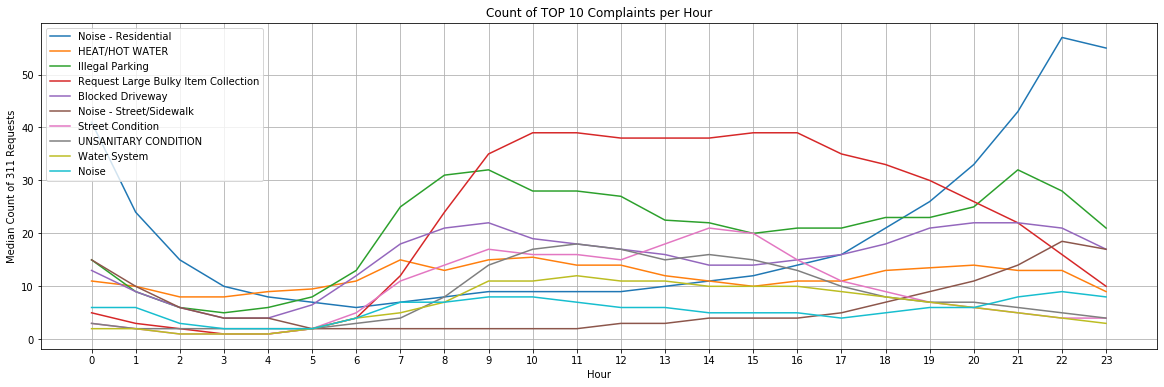

In [114]:
plt.figure(figsize=(20, 6))

for i in top_10.complaint_type:
  complaint_hour=hour[hour.complaint_type==i]
  plt.plot(complaint_hour.hour, complaint_hour.median_requests,label=i)
plt.xticks(complaint_hour.hour)
plt.grid()
plt.title('Count of TOP 10 Complaints per Hour')
plt.xlabel('Hour')
plt.ylabel('Median Count of 311 Requests')
plt.legend()

Step 6. Trends by day of week

Reproduce the steps in 5, but this time aggregate by weekday, date, and complaint_type. Produce a similar plot where the x values will be the days of the week and the y values will be the median count of requests per complaint type

In [98]:
weekday = filtered_311[['weekday', 'weekday_name','complaint_type']].groupby(['weekday', 'weekday_name','complaint_type']).size().reset_index(name='count_requests')
weekday.head()

,weekday,weekday_name,complaint_type,count_requests
0,0,Monday,Blocked Driveway,20598
1,0,Monday,HEAT/HOT WATER,33804
2,0,Monday,Illegal Parking,28130
3,0,Monday,Noise,7990
4,0,Monday,Noise - Residential,25510


In [99]:
weekday_median = weekday.groupby([ 'weekday','weekday_name','complaint_type'])['count_requests'].median().reset_index(name='median_requests')
weekday_median.head()

,weekday,weekday_name,complaint_type,median_requests
0,0,Monday,Blocked Driveway,20598
1,0,Monday,HEAT/HOT WATER,33804
2,0,Monday,Illegal Parking,28130
3,0,Monday,Noise,7990
4,0,Monday,Noise - Residential,25510


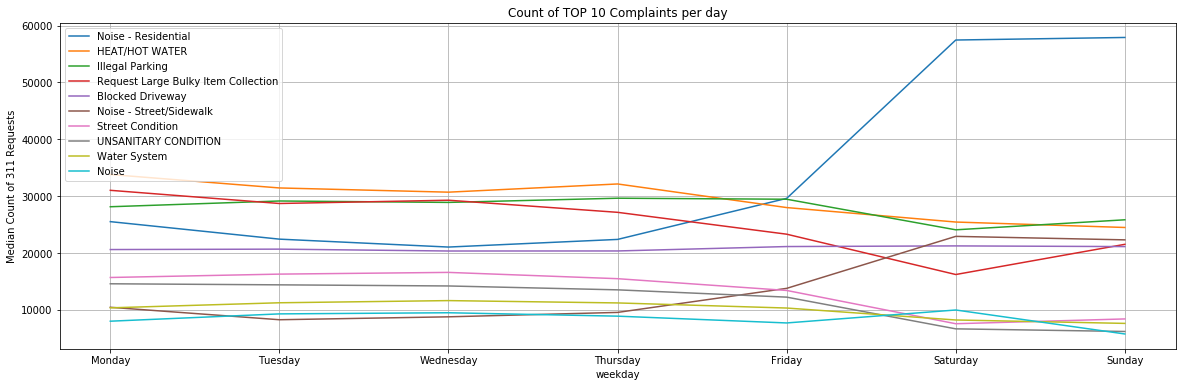

In [116]:
plt.figure(figsize=(20, 6))

for i in top_10.complaint_type:
  complaint_weekday=weekday_median[weekday_median.complaint_type==i]
  plt.plot(complaint_weekday.weekday_name, complaint_weekday.median_requests,label=i)
plt.xticks(complaint_weekday.weekday_name)
plt.grid()
plt.title('Count of TOP 10 Complaints per day')
plt.xlabel('weekday')
plt.ylabel('Median Count of 311 Requests')
plt.legend(loc=2)

Step 7. Trends by month

Reproduce the steps in 5, but this time aggregate by month, year (not date), and complaint_type. Produce a similar plot where x values will days of the week and y values will be the median count of requests per complaint type

In [104]:
year = filtered_311[['year', 'month','complaint_type']].groupby(['year', 'month','complaint_type']).size().reset_index(name='count_requests')
year.head()

,year,month,complaint_type,count_requests
0,2018,8,Blocked Driveway,10871
1,2018,8,HEAT/HOT WATER,2734
2,2018,8,Illegal Parking,13853
3,2018,8,Noise,3917
4,2018,8,Noise - Residential,16542


In [110]:
year_median = year.groupby([ 'month','complaint_type'])['count_requests'].median().reset_index(name='median_requests')
year_median.head()

,month,complaint_type,median_requests
0,1,Blocked Driveway,11393.0
1,1,HEAT/HOT WATER,46387.0
2,1,Illegal Parking,13189.0
3,1,Noise,4805.0
4,1,Noise - Residential,16176.0


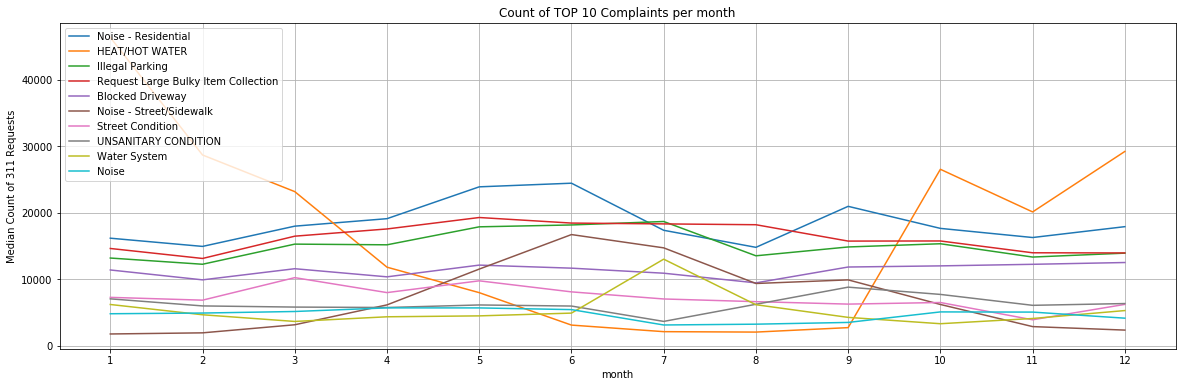

In [117]:
plt.figure(figsize=(20, 6))

for i in top_10.complaint_type:
  complaint_year=year_median[year_median.complaint_type==i]
  plt.plot(complaint_year.month, complaint_year.median_requests,label=i)
plt.xticks(complaint_year.month)
plt.grid()
plt.title('Count of TOP 10 Complaints per month')
plt.xlabel('month')
plt.ylabel('Median Count of 311 Requests')
plt.legend(loc=2)

Step 8. Write a few sentences with your observations on how the occurrence of different complaint types varies over time, informed by the charts you produced in Steps 5-7.


1. For the hour trend, we find out that the complaint about the noise raise up during midnight, around 10pm to 1am. Also, people are more likely to complaint about requesting large bulky item colletion during the day time, around 9am to 4pm. 

2. For the weekday trend, the complaint of resident noise go way to up on the weekedns compared to weekday. This may be showed that people are more likely having late-night party during the weekends. 

3. For the month trend, people are more likley to complaint about the hot water during the winter, which is staring at October and ending at February. When the summer comes, people are no longer care about the hot water. 